[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-04-08   91.661499   92.510002   91.255501   92.492996   92.492996   
2019-04-09   92.274498   92.654503   91.588997   91.792000   91.792000   
2019-04-10   92.050003   92.400002   91.440498   92.366501   92.366501   
2019-04-11   92.434998   92.497498   92.015503   92.203499   92.203499   
2019-04-12   92.419998   92.574997   92.065002   92.153000   92.153000   
...                ...         ...         ...         ...         ...   
2023-04-26  105.040001  106.620003  104.099998  104.980003  104.980003   
2023-04-27  108.160004  110.860001  106.800003  109.820000  109.820000   
2023-04-28  107.730003  109.480003  104.330002  105.449997  105.449997   
2023-05-01  104.949997  105.230003  101.820000  102.050003  102.050003   
2023-05-02  101.470001  103.900002  101.150

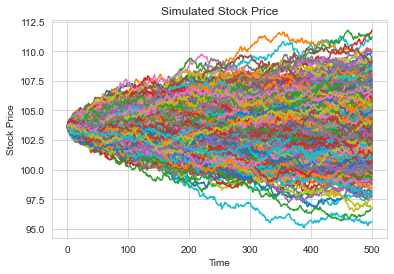

In [31]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import math
from datetime import date
import seaborn as sns

# Define stock symbol and date range
symbol = "AMZN"
start_date = "2019-04-08"
end_date = date.today()

# Download stock data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)
print(data)

# Retrieve the options chain data
data2 = yf.Ticker(symbol)
DF_calls, DF_puts = data2.option_chain(data2.options[0])
print(data2)
# Check the type of options (American or European)
option_type = 'test'
today = pd.Timestamp.today().date()
if 'expiration' in DF_calls.columns:
    if (DF_calls['expiration'].min().date() - today).days > 0:
        option_type = 'American'
elif 'expiration' in DF_puts.columns:
    if (DF_puts['expiration'].min().date() - today).days > 0:
        option_type = 'American'

# Print the type of options
print(f"The options for {symbol} are {option_type} style.")
print(DF_calls)

# Calculate log returns
returns = np.log(data["Adj Close"] / data["Adj Close"].shift(1)).dropna()
#print(returns)

# Estimate parameters of the GBM model
mu = returns.mean()
sigma = returns.std()

# Define simulation parameters
S0 = data["Adj Close"][-1] # current stock price
r = 0.05 # risk-free rate
T = 1 # time horizon
M = 500# number of time steps
N = 1000 # number of simulations

# Simulate stock prices using GBM
dt = T / M
price_matrix = np.zeros((N, M+1))
price_matrix[:, 0] = S0
for i in range(N):
    for j in range(1, M+1):
        price_matrix[i, j] = price_matrix[i, j-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.normal())
print(price_matrix)

# Plot simulated stock prices
fig, ax = plt.subplots()
ax.plot(price_matrix.T)
ax.set_xlabel("Time")
ax.set_ylabel("Stock Price")
ax.set_title("Simulated Stock Price")
plt.show()

In [32]:
def histogram(a,values):
    xmin=np.min(a)
    xmax=np.max(a)
    L=100 #the number of segments
    Del=(xmax-xmin)/L
    bin_cents=[xmin+Del/2+k*Del for k in range(L)]
    bin_mins=[xmin+k*Del for k in range(L)]
    bin_maxs=[xmin+(k+1)*Del for k in range(L)]
    counts=np.zeros(L)
    for c1 in range(values):
        k=int(np.floor((a[c1]-xmin)/Del))
        if k>=L:
            counts[L-1]+=1
        else:
            counts[k]+=1
    sns.set_style('whitegrid')
    axes=sns.barplot(x=bin_cents,y=counts/values,palette='bright')
    axes.set(xlabel='Value',ylabel='Frequency')

Date
2019-04-09   -0.007608
2019-04-10    0.006239
2019-04-11   -0.001766
2019-04-12   -0.000548
2019-04-15    0.000982
                ...   
2023-04-26    0.023224
2023-04-27    0.045073
2023-04-28   -0.040606
2023-05-01   -0.032774
2023-05-02    0.015364
Name: Adj Close, Length: 1024, dtype: float64


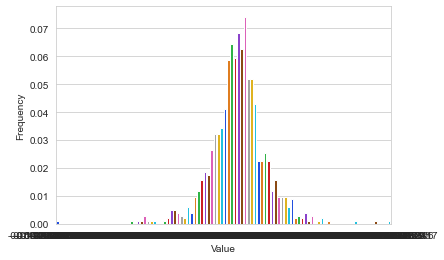

In [33]:
print(returns)
histogram(returns, len(returns))

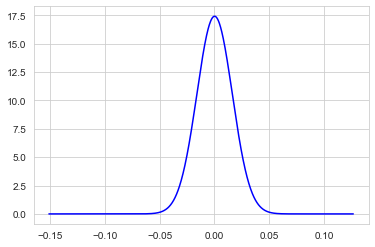

In [34]:
norm_ret = returns
X = np.linspace(min(norm_ret), max(norm_ret), len(norm_ret))
Y = (1/(2*np.pi*(sigma**2))**0.5)*np.exp(-(X-mu)**2/(sigma)**2)
plt.plot(X, Y, color='blue', label = "Standard Normal")

In [35]:
options = data2.option_chain()
calls = options.calls
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AMZN230505C00060000,2023-05-01 16:20:06+00:00,60.0,43.06,0.0,0.0,0.0,0.0,8.0,0,0.000010,True,REGULAR,USD
1,AMZN230505C00065000,2023-04-21 15:32:00+00:00,65.0,42.25,0.0,0.0,0.0,0.0,1.0,0,0.000010,True,REGULAR,USD
2,AMZN230505C00070000,2023-04-26 19:04:52+00:00,70.0,35.20,0.0,0.0,0.0,0.0,1.0,0,0.000010,True,REGULAR,USD
3,AMZN230505C00075000,2023-05-01 13:55:18+00:00,75.0,29.30,0.0,0.0,0.0,0.0,2.0,0,0.000010,True,REGULAR,USD
4,AMZN230505C00076000,2023-05-02 19:15:53+00:00,76.0,27.95,0.0,0.0,0.0,0.0,5.0,0,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,AMZN230505C00140000,2023-05-01 14:30:46+00:00,140.0,0.01,0.0,0.0,0.0,0.0,24.0,0,0.500005,False,REGULAR,USD
65,AMZN230505C00145000,2023-05-01 14:23:16+00:00,145.0,0.01,0.0,0.0,0.0,0.0,500.0,0,0.500005,False,REGULAR,USD
66,AMZN230505C00150000,2023-05-01 15:51:13+00:00,150.0,0.01,0.0,0.0,0.0,0.0,21.0,0,0.500005,False,REGULAR,USD
67,AMZN230505C00155000,2023-04-28 13:30:02+00:00,155.0,0.03,0.0,0.0,0.0,0.0,5.0,0,0.500005,False,REGULAR,USD


103.62999725341797
[[4.64082684 4.64020124 4.64056696 ... 4.64107569 4.64117076 4.64116349]
 [4.64082684 4.64072692 4.63967452 ... 4.64070913 4.64024415 4.64311012]
 [4.64082684 4.6394815  4.63914152 ... 4.63979129 4.63943128 4.64313744]
 ...
 [4.64082684 4.64049489 4.68846098 ... 4.63002338 4.71356139 4.6473598 ]
 [4.64082684 4.63907584 4.68899092 ... 4.62848974 4.71381041 4.64780754]
 [4.64082684 4.63892765 4.68967939 ... 4.62742639 4.71506469 4.64735419]]
[[103.62999725 103.56518731 103.60306971 ... 103.65578934 103.66564463
  103.66489075]
 [103.62999725 103.61964329 103.51065147 ... 103.61780051 103.56963094
  103.86688425]
 [103.62999725 103.49067381 103.45549525 ... 103.52273878 103.4854764
  103.86972201]
 ...
 [103.62999725 103.59560352 108.68578126 ... 102.51646087 111.44836561
  104.30922491]
 [103.62999725 103.44870072 108.74339383 ... 102.35935839 111.47612103
  104.35593864]
 [103.62999725 103.43337088 108.81828637 ... 102.25057236 111.61603167
  104.30863881]]


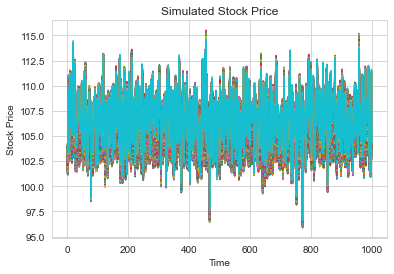

In [36]:
def geo_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = np.log(S) +  np.cumsum(((r - q - 0.5*(sigma**2))*dt + sigma*np.sqrt(dt) * np.random.normal(size=(steps,N))),axis=0)
    print(S)
    ST[:,0] = np.log(S)
    print(ST)
    return np.exp(ST)

q = 0.02
paths= geo_paths(S0,T,r, q,sigma,M,N)
print(paths)

# plt.plot(paths);
# plt.xlabel("Time Increments")
# plt.ylabel("Stock Price")
# plt.title("Geometric Brownian Motion")
fig, ax = plt.subplots()
ax.plot(paths.T)
ax.set_xlabel("Time")
ax.set_ylabel("Stock Price")
ax.set_title("Simulated Stock Price")
plt.show()

In [37]:
import seaborn as sns
def histogram(a,values):
    xmin=np.min(a)
    xmax=np.max(a)
    print(xmin)
    print(xmax)
    L=100 #the number of segments
    Del=(xmax-xmin)/L
    bin_cents=[xmin+Del/2+k*Del for k in range(L)]
    bin_mins=[xmin+k*Del for k in range(L)]
    bin_maxs=[xmin+(k+1)*Del for k in range(L)]
    counts=np.zeros(L)
    for c1 in range(values):
        k=int(np.floor((a[c1]-xmin)/Del))
        if k>=L:
            counts[L-1]+=1
        else:
            counts[k]+=1
    sns.set_style('whitegrid')
    axes=sns.barplot(x=bin_cents,y=counts/values,palette='bright')
    axes.set(xlabel='Value',ylabel='Frequency')

(500, 1000)
100.64283066481133
103.62999725341797
0.00011102921057264321 0.022913789068647012


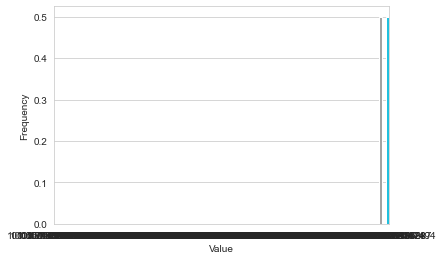

In [38]:
print(np.shape(paths))
#print(price_matrix[:,365])
histogram(price_matrix[-1,:],2)
print(mu, sigma)

0.9324776851135077
1.073170056589408


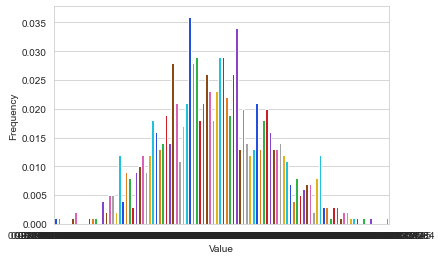

In [39]:
#Test
s = np.random.normal(mu, sigma, 1000)
histogram(np.exp(s),1000)    

In [25]:
def black_scholes_call(S,K,T,r,q,sigma):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # call_price = value of the option 
    """
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / sigma*np.sqrt(T)
    d2 = d1 - sigma* np.sqrt(T)
    
    call = S * np.exp(-q*T)* norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
    return call

In [26]:
#S = 100 #stock price S_{0}
#K = 110 # strike
K = 200
T = 5/365 # time to maturity
#r = 0.05 # risk free risk in annual %
q = 0.02 # annual dividend rate
#sigma = 0.25 # annual volatility in %
#steps = 10 # time steps
steps = M
N = 1000 # number of trials


payoffs = np.maximum(paths[-1]-K, 0)
option_price = np.mean(payoffs)*np.exp(-r*T) #discounting back to present value

bs_price = black_scholes_call(S0,K,T,r,q,sigma)

print(f"Black Scholes Price is {bs_price}")
print(f"Simulated price is {option_price}")

Black Scholes Price is -1.47050985508071
Simulated price is 0.0


In [27]:
def binomial_european_call(S, K, T, r, q, sigma, N):
    """ 
    This function prices European call options using the binomial model.
    Input parameters:
    S : float : initial stock price
    K : float : strike price
    T : float : time to expiration (in years)
    r : float : risk-free interest rate
    sigma : float : volatility
    N : int : number of time steps
    Output:
    float : option price
    """
    dt = T / N
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    p = (math.exp((r -q) * dt) - d) / (u - d)

    # Download the historical data of the stock
    symbol = "ASML"
    start_date = "2019-01-01"
    end_date = "2022-01-01"
    stock_data = yf.download(symbol, start=start_date, end=end_date)

    # Calculate the daily returns of the stock
    stock_data["Returns"] = stock_data["Adj Close"].pct_change()

    # Calculate the daily volatility of the stock
    daily_volatility = stock_data["Returns"].std()

    # Annualize the volatility
    annual_volatility = daily_volatility * math.sqrt(252)

    # Calculate the expected return of the stock
    expected_return = stock_data["Returns"].mean()

    # Calculate the risk-free rate
    risk_free_rate = 0.02

    # Adjust the parameters for the binomial model
    u = math.exp((expected_return - 0.5 * annual_volatility ** 2) * dt + annual_volatility * math.sqrt(dt))
    d = math.exp((expected_return - 0.5 * annual_volatility ** 2) * dt - annual_volatility * math.sqrt(dt))
    p = (math.exp(risk_free_rate * dt) - d) / (u - d)

    # Calculate the stock prices at each node
    stock_prices = []
    for i in range(N+1):
        stock_prices.append(S * u**(N-i) * d**(i))

    # Calculate the option prices at expiration
    option_values = [max(0, stock_prices[i] - K) for i in range(N+1)]

    # Calculate the option prices at earlier time steps
    for n in range(N-1, -1, -1):
        for i in range(n+1):
            option_values[i] = math.exp(-risk_free_rate*dt) * (p * option_values[i] + (1-p) * option_values[i+1])

    return option_values[0]

In [28]:
bi_price = binomial_european_call(S0,K,T,r,q,sigma,steps)

[*********************100%***********************]  1 of 1 completed


In [29]:
print(bi_price)

2.107077703472265e-05


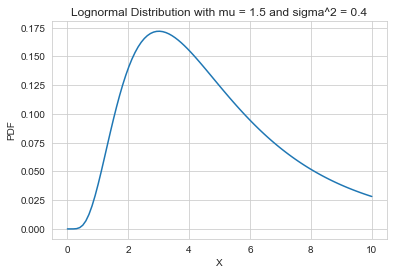

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Set mean and variance of the distribution
mu = 1.5
sigma2 = 0.4

# Calculate shape and scale parameters of the lognormal distribution
s = np.sqrt(sigma2)
scale = np.exp(mu)

# Generate a range of x values
x = np.linspace(0, 10, 100)

# Evaluate the lognormal distribution at the x values
pdf = lognorm.pdf(x, s=s, scale=scale)

# Plot the lognormal distribution
plt.plot(x, pdf)
plt.title('Lognormal Distribution with mu = {} and sigma^2 = {}'.format(mu, sigma2))
plt.xlabel('X')
plt.ylabel('PDF')
plt.show()
